In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

There are 2 ways to load built-in iris dataset in python

### sklearn dataset
In this dataset, the data and target are stored separately with various other information which one can see using dataset.keys()

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


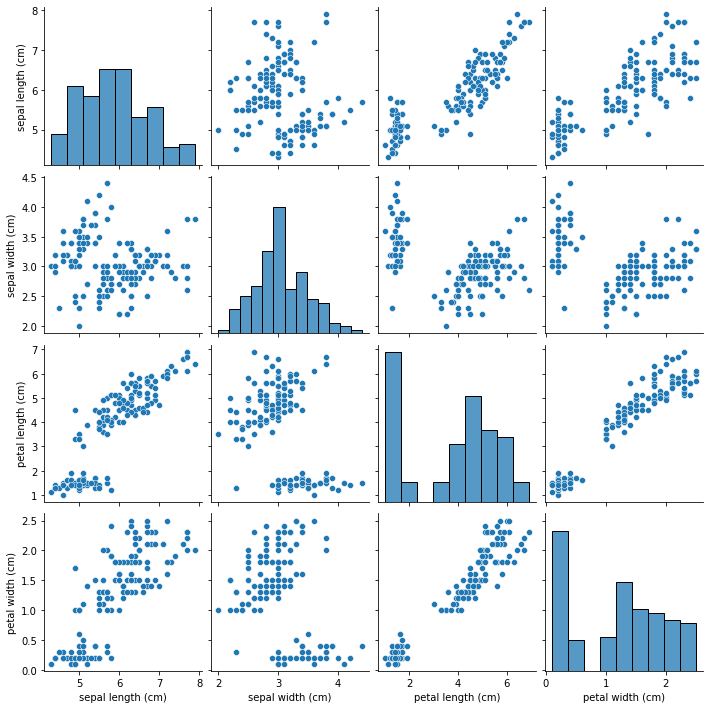

In [10]:
sns.pairplot(data =df)

### seaborn dataset
In this dataset, the data and target both are in the same DataFrame

In [11]:
sns_iris = sns.load_dataset('iris')

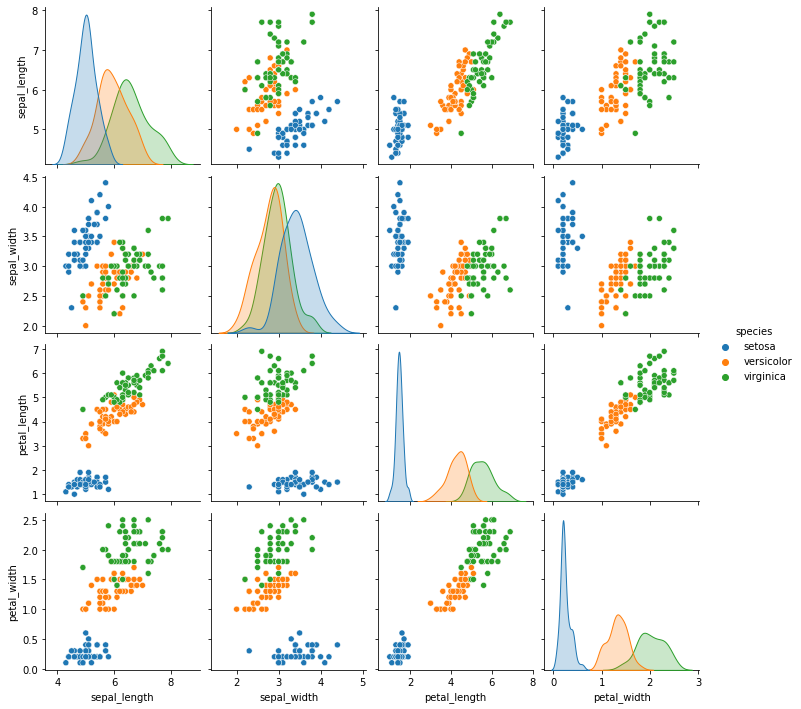

In [12]:
sns.pairplot(data = sns_iris,hue = 'species')

In [13]:
sns_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:ylabel='Density'>

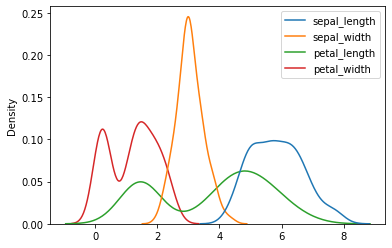

In [14]:
sns.kdeplot(sns_iris)

In [15]:
sns_iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [16]:
setosa = sns_iris[sns_iris['species'] == 'setosa']

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

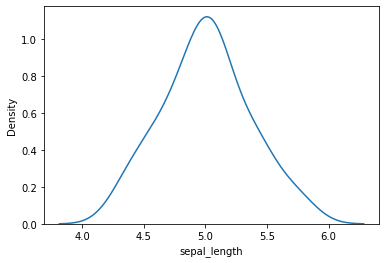

In [22]:
sns.kdeplot(setosa['sepal_length'])

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
x = sns_iris.drop('species',axis =1)
y = sns_iris['species']

In [28]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size =0.3,random_state = 101)

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC()

In [31]:
model.fit(x_train,y_train)

SVC()

In [32]:
pred = model.predict(x_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [35]:
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


### GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid_param = {'C' : [0.1,1,10,100],
              'gamma' : [1,0.1,0.01,0.01],
              'kernel' : ['rbf']}

grid = GridSearchCV(SVC(),grid_param,verbose=3,refit=True)

In [38]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
grid_pred = grid.predict(x_test)

In [40]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [41]:
print(confusion_matrix(y_test,grid_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [42]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [43]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}